# Bitcoin Historical Data
2012年1月から2020年4月までの、一部の取引所の1分間隔ビットコインのデータ

## Overview

ビットコインは、2009年に匿名のサトシ・ナカモトによってオープンソースとして初めてリリースされた、最も長く続いている、最もよく知られている暗号通貨です。ビットコインは、信頼できる記録保持機関や中央の仲介者を必要とせずに、取引が検証され、公共の分散型台帳（ブロックチェーン）に記録されているデジタル交換の分散型媒体として機能します。取引ブロックには、以前の取引ブロックの SHA-256 暗号ハッシュが含まれており、これまでに発生したすべての取引の不変の記録として機能します。市場での通貨/コモディティと同様に、ビットコインの取引と金融商品はすぐにビットコインの一般的な採用に続いて、成長を続けています。ここには、取引が行われているビットコイン取引所の1分間隔のビットコイン市場の過去のデータが含まれています。ハッピー（データ）マイニング！

```
coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv
bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv 
```

### Content
2012年1月から2020年4月までの期間の選択されたビットコイン取引所のCSVファイルで、OHLC（Open, High, Low, Close）、BTCと表示通貨のボリューム、加重ビットコイン価格が分単位で更新されています。タイムスタンプはUnix時間で表示されます。取引やアクティビティのないタイムスタンプは、データフィールドがNaNで埋められています。タイムスタンプが欠けていたり、ジャンプしている場合は、取引所（またはそのAPI）がダウンしていたか、取引所（またはそのAPI）が存在しなかったか、またはデータの報告や収集における他の予期せぬ技術的なエラーが原因である可能性があります。エントリーを重複排除し、内容が正確で完全であることを確認するためにあらゆる努力が払われていますが、明らかに自己責任で信頼してください。

## 評価方法

コンペではないので評価指標はありません。

## 今回見たNotebook

[Using rNN and ARIMA to predict BITCOIN price](https://www.kaggle.com/zikazika/using-rnn-and-arima-to-predict-bitcoin-price)

* 選んだ理由

MostVotes

このカーネルの目的はNNとARIMAモデリングを比較することです。我々は、ビットコインの過去のデータを使ってビットコインの価格を予測します。

データセットの作者が削除・変更を行ったため、カーネルが完全に機能していません。そのため、カーネルは完全には機能していません。しかし、コードは元のデータの仮定が満たされている場合のものです。


## RNN To predict bitcoin prices

In [1]:
# First step, import libraries and then dataset
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Import the dataset and encode the date
df = pd.read_csv("coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
2099755,1546898520,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309,2019-01-07
2099756,1546898580,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233,2019-01-07
2099757,1546898640,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635,2019-01-07
2099758,1546898700,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991,2019-01-07
2099759,1546898760,4005.51,4006.01,4005.51,4005.99,1.752778,7021.183546,4005.745614,2019-01-07


In [3]:
Real_Price

date
2014-12-01     335.000000
2014-12-02     377.854911
2014-12-03     377.818333
2014-12-04     377.100000
2014-12-06     378.000000
                 ...     
2019-01-03    3829.900978
2019-01-04    3785.337456
2019-01-05    3834.565401
2019-01-06    3874.337968
2019-01-07    4025.017616
Name: Weighted_Price, Length: 1465, dtype: float64

ビットコインの予測は1ヶ月間になるので、それに応じてデータセットを分割する必要があります。

In [4]:
# split data
prediction_days = 30
df_train= Real_Price[len(Real_Price)-prediction_days:]
df_test= Real_Price[:len(Real_Price)-prediction_days]

一部の前処理も必要です。

In [5]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

今すぐケラスはrNNを構築するために、長期短期記憶! LSTM

Now keras to build the rNN, Long short-term memory!!! LSTM

In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Using TensorFlow backend.
/Users/kouta/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kouta/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kouta/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16",


Epoch 1/100
29/29 [==============================] - 1s 25ms/step - loss: 0.3540
Epoch 2/100
29/29 [==============================] - 0s 665us/step - loss: 0.3357
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 0.3192
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3026
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 0.2863
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 0.2715
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 0.2577
Epoch 8/100
29/29 [==============================] - 0s 1ms/step - loss: 0.2442
Epoch 9/100
29/29 [==============================] - 0s 1ms/step - loss: 0.2309
Epoch 10/100
29/29 [==============================] - 0s 1ms/step - loss: 0.2190
Epoch 11/100
29/29 [==============================] - 0s 993us/step - loss: 0.2079
Epoch 12/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1963
Epoch 13/100
29/29 [===========

29/29 [==============================] - 0s 1ms/step - loss: 0.0581
Epoch 100/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0580


### NOTE! 
鍵となるのは「フォロー」であり、それがNNが「失敗」する理由である。我々は将来の値を予測するために今日の値を使用しました。これはNNの失敗ではありませんが、私たちがNNに何を「与えているか」を考える必要があることを示しています。なぜなら、NNは価格が昨日の価格よりもわずかに高くなることだけを学習する可能性があるからです。そうでない場合を除いて、それは真実です。そうでない場合は別ですが。

In [7]:
test_set = df_test.values[1:]
sc = MinMaxScaler()
inputs = np.reshape(df_test.values[0:len(df_test)-1], (len(test_set), 1))
inputs = sc.fit_transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

In [8]:
import matplotlib.dates as mdates

ValueError: cannot insert level_0, already exists

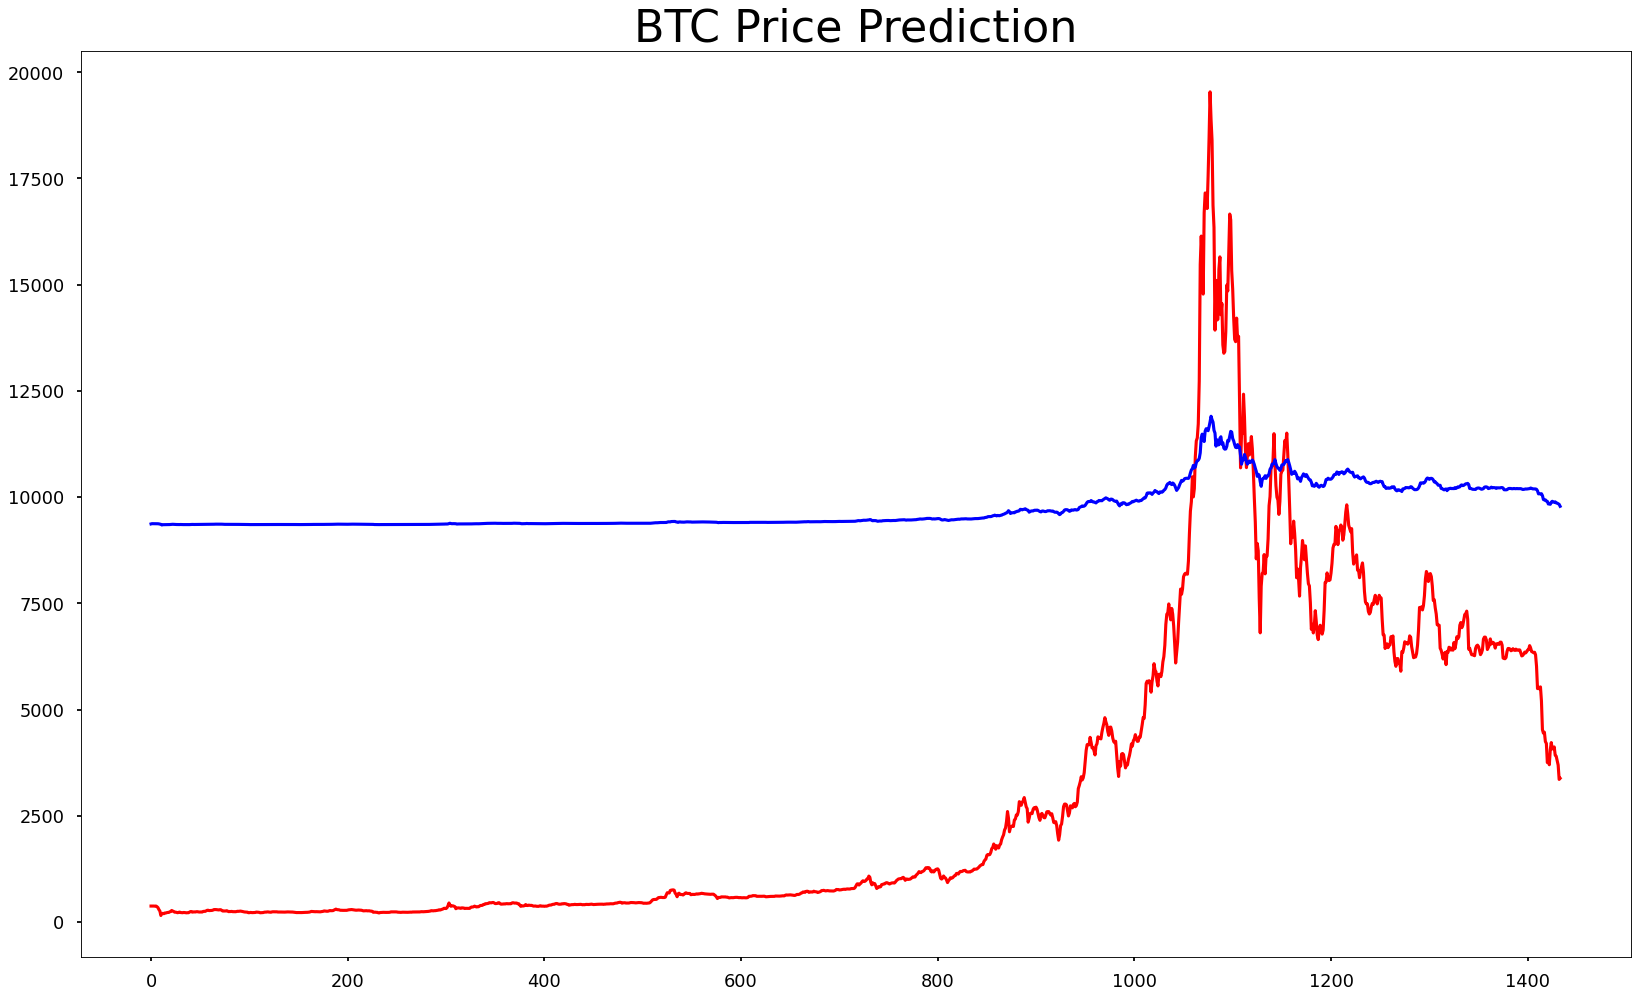

In [30]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)

plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

## ARIMA 
まず、ARIMAの理論的な部分を見てみましょう。(NNはすでに知っているはずですが、そうでない場合は他のカーネルを参照してください。

ARIMAモデルは、時系列データを分析・予測するための統計モデルの一群です。ARIMAモデルは非定常性のための1つのモデルである。ARIMAモデルは、データが差分をとった後に定常になることを前提としています。

ARIMAはAutoRegressive Integrated Moving Averageの頭文字をとったものです。より単純なAutoRegressive Moving Averageの一般化であり、統合の概念を加えたものである。

これらの略語は、それをかなりよく表しています。

* __AR__: Autoregression. あるオブザベーションといくつかの数の遅れたオブザベーションとの間の従属関係を使用するモデル。
* __I__: Integrated. 時系列を定常化するために、生のオブザベーションの差分（例えば、以前のタイム・ステップでのオブザベーションからのオブザベーションの減算）を使用する。
* __MA__: Moving Average（移動平均）。ラギングされたオブザベーションに適用された移動平均モデルからのオブザベーションと残差誤差の間の依存性を使用するモデル。

これらの各コンポーネントは、モデル内でパラメータとして明示的に指定されています。ARIMA(p,d,q)という標準的な表記法が使用されており、ここでは、使用されている特定のARIMAモデルを素早く示すために、パラメータが整数値で置き換えられています。

パラメータは以下のように定義されています。

* __p__: モデルに含まれるラグ・オブザベーションの数で，ラグ順序とも呼ばれる。
* __d__: 生のオブザベーションが差分化される回数（差分化の程度とも呼ばれる）。
* __q__: 移動平均窓のサイズ（移動平均の順序とも呼ばれる）。

### 重要

時系列にARIMAモデルを採用することは、オブザベーションを生成した基礎となるプロセスがARIMAプロセスであることを前提とする。これは明白に見えるかもしれないが、生のオブザベーションとモデルからの予測の残差誤差でモデルの仮定を確認する必要性を動機づけるのに役立つ。



しかし、それをどうやって確認するのでしょうか？また、モデルのパラメータp,d,qをどのように決定するのでしょうか？まず第一に、時系列が定常であることを確認する必要がありますが、そこでは差分法が使われます（可能であれば、次数は非定常性のレベルを補正します）。


基本的には、次のような状況になります。

* ARIMA() を呼び出し、p, d, q パラメータを渡してモデルを定義します。
* fit()関数を呼び出すことで、学習データ上にモデルが作成されます。
* 予測は predict() 関数を呼び出して、予測したい時間や時間のインデックスを指定することで行うことができます。

ボックスジェンキンス法の仕組み 

[https://machinelearningmastery.com/gentle-introduction-box-jenkins-method-time-series-forecasting/](https://machinelearningmastery.com/gentle-introduction-box-jenkins-method-time-series-forecasting/)

それではコーディングを始めよう！

In [10]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [11]:
# Load data
df = pd.read_csv("coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


インデックスを時間データに変換し、時間間隔を分割する必要があります。

In [12]:
# Unix-time to UNIX時間に
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

# Resampling to daily frequency 日頻度にリサンプリング
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency 月頻度にリサンプリング
df_month = df.resample('M').mean()

# Resampling to annual frequency 年頻度にリサンプリング
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency 四半期毎の頻度にリサンプリング
df_Q = df.resample('Q-DEC').mean()

トレンドを可視化する

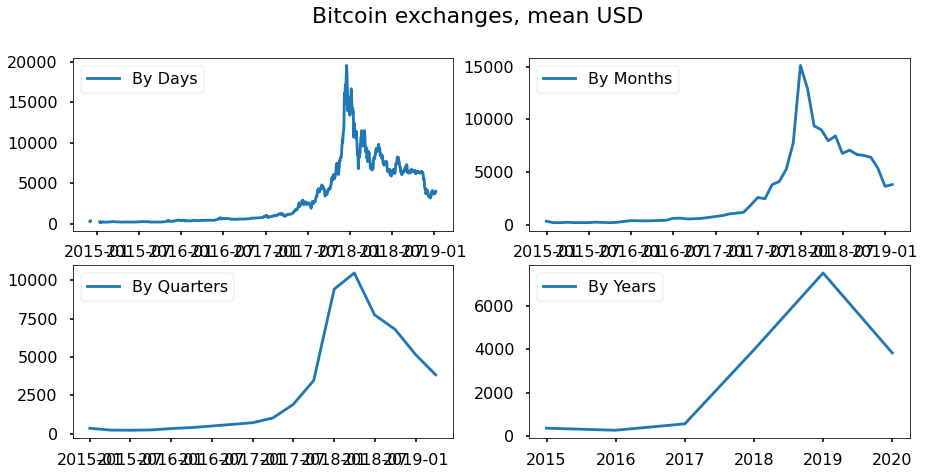

In [13]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

### 定常性チェックと系列のSTL分解
* p値が低いほど良い。定常性は我々のモデルの大前提であり、ディッキーフラーは単位根検定の仮説検定に過ぎない。

Dickey–Fuller test: p=0.592162


<Figure size 1080x504 with 0 Axes>

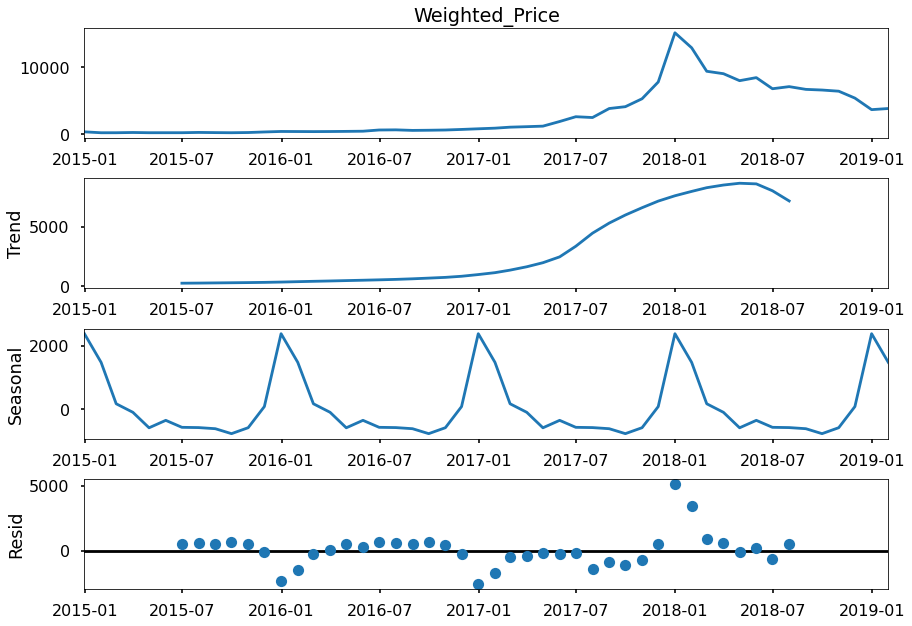

In [14]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Weighted_Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])
plt.show()

明らかに定常ではないので、データを変換する必要があります。最初にBox-cox変換を行い、検定をチェックします。

In [15]:
# Box-Cox Transformations
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.Weighted_Price)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

Dickey–Fuller test: p=0.592162


In [33]:
df_month

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_box,prices_box_diff,prices_box_diff2
Timestamp,,,,,,,,,,
2014-12-31,367.624696,367.628664,367.054140,367.058108,0.589727,212.806380,367.348300,3.863102,NaN,NaN
2015-01-31,231.336491,233.555115,229.653439,231.797129,2.345471,586.751021,231.637236,3.672384,NaN,NaN
2015-02-28,234.332466,234.483321,234.201933,234.343998,7.415321,1752.404108,234.350704,3.677371,NaN,NaN
2015-03-31,269.897876,270.027382,269.772040,269.910322,7.979565,2151.056990,269.904893,3.737141,NaN,NaN
2015-04-30,235.712932,235.786104,235.642352,235.718787,5.923033,1391.584683,235.718184,3.679859,NaN,NaN
2015-05-31,237.745831,237.788676,237.703138,237.748012,5.364014,1275.311249,237.748220,3.683522,NaN,NaN
2015-06-30,237.807924,237.852170,237.765924,237.809633,4.974160,1189.149079,237.810849,3.683634,NaN,NaN
2015-07-31,279.908006,279.975362,279.842773,279.911395,5.267395,1481.132385,279.911239,3.752334,NaN,NaN
2015-08-31,253.329272,253.392607,253.268414,253.330645,5.455620,1341.638648,253.332356,3.710490,NaN,NaN


もう一つの変革が必要です。季節ごとの差別化

In [16]:
# Seasonal differentiation
df_month['prices_box_diff'] = df_month.Weighted_Price_box - df_month.Weighted_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.629739


ここでも系列は定常ではないので、最後に正規微分を試してみましょう。

Dickey–Fuller test: p=0.824140


<Figure size 1080x504 with 0 Axes>

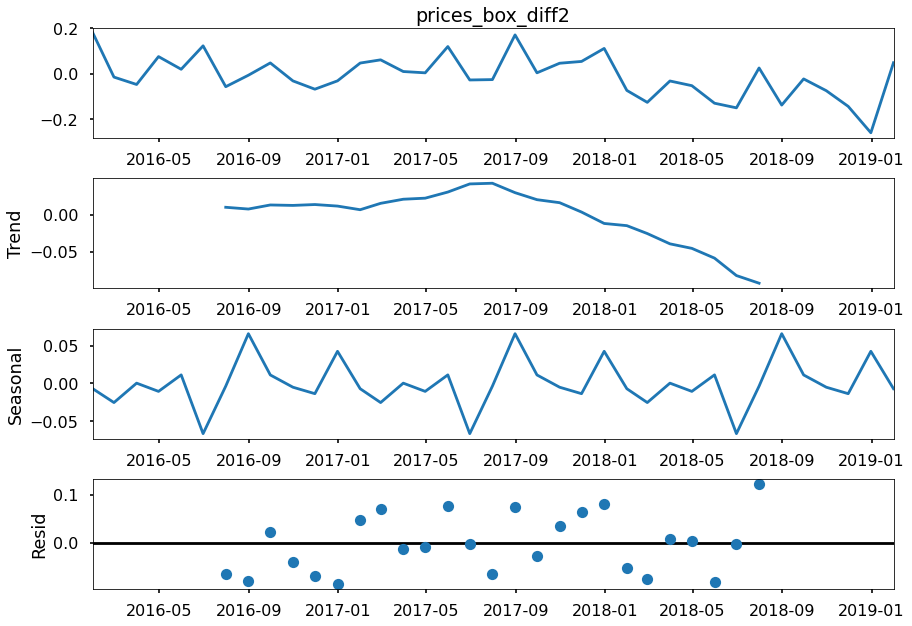

In [17]:
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])

plt.show()

ここで、自己相関関数(ACF)の助けを借りてモデルを選択する必要があります。

* 自己相関関数 (ACF)。プロットは、オブザベーションとラグ値の相関を要約しています。x軸はラグを示し、y軸は負と正の相関のための-1と1の間の相関係数を示します。
* 偏自己相関関数（PACF）。プロットは、先行するラグされたオブザベーションによって説明されないラグ値を持つオブザベーションのための相関を要約する。我々は、パラメータ間隔の基本的な画像を得ることができ、このヒューリスティックな手法を用いて、AIC-赤池情報量基準の助けを借りて、ARIMAのための最良のp,q,dはどれかを決定することができる。

In [18]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], 12),initialization='approximate_diffuse').fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [19]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
19  (1, 0, 0, 1)  134.708089
0   (0, 0, 0, 0)  135.262320
18  (1, 0, 0, 0)  135.546421
6   (0, 1, 0, 0)  136.372369
37  (2, 0, 0, 1)  136.799140
                                      SARIMAX Results                                       
Dep. Variable:                   Weighted_Price_box   No. Observations:                   50
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 -64.354
Date:                              Tue, 15 Sep 2020   AIC                            134.708
Time:                                      10:54:30   BIC                            140.444
Sample:                                  12-31-2014   HQIC                           136.892
                                       - 01-31-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

よし、これでARIMAモデルで予測ができるようになった。

In [20]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

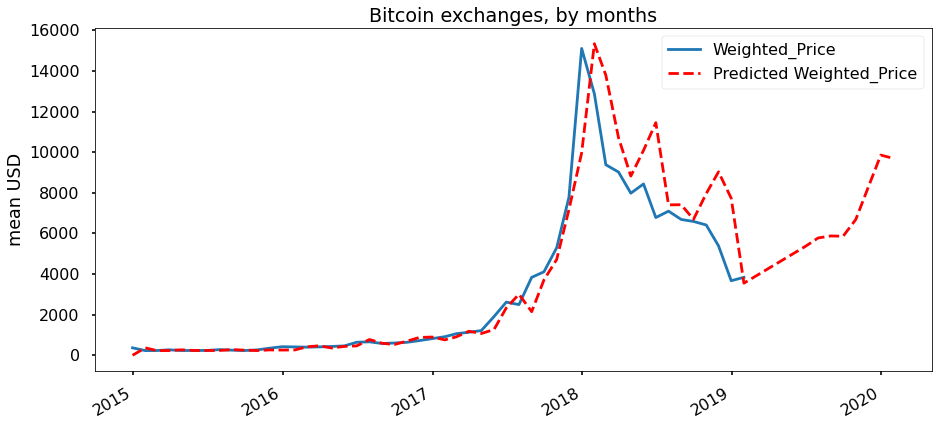

In [21]:
# Prediction
df_month2 = df_month[['Weighted_Price']]
#date_list = [datetime(2020, 6, 30), datetime(2020, 7, 31), datetime(2020, 8, 31), datetime(2020, 9, 30), 
#             datetime(2020, 10, 31), datetime(2020, 11, 30), datetime(2020, 12, 31), datetime(2021, 1, 31),
#             datetime(2021, 2, 28)]
date_list = [datetime(2019, 6, 30), datetime(2019, 7, 31), datetime(2019, 8, 31), datetime(2019, 9, 30), 
             datetime(2019, 10, 31), datetime(2019, 11, 30), datetime(2019, 12, 31), datetime(2020, 1, 31),
             datetime(2020, 2, 28)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
df_month2.loc[df_month2.forecast > 10e+10, "forecast"] = 2.583e+02
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

In [22]:
future

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_box,prices_box_diff,prices_box_diff2
2019-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 今回のまとめ

* 時系列データの予測にはARIMAモデルが良い。
* ただし定常でなくてはならないので、定常化処理が必須な上に時系列データならなんでも良いわけじゃない。
* 割と単純に定常にしたデータを元にちょっとチューニングしたARIMAモデルでそれなりに予測出来ていたっぽい。すごい。
* 統計学わからなさすぎ

__わからなかった用語__
* ARIMAモデル
* ボックスジェンキンス法
* STL分解
* 単位根
* 定常性
* ディッキーフラー検定
* box-cox
* AIC-Akaike's Information Criterion
* statsmodels